Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Raw Data

In [2]:
df = pd.read_csv("c:/Users/Krzysiek/OneDrive/Dokumenty/WD/Private/python/blinkit_grocery_data/BlinkIT Grocery Data.csv", sep=';')

Sample Data

In [3]:
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,"0,1000135","15,1","145,4786",5
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,"0,008596051","11,8","115,3492",5
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,"0,025896485","13,85","165,021",5
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,"0,042277867","12,15","126,5046",5
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,"0,033970195","19,6","55,1614",5
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,"0,005505481","8,89","102,4016",5
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,"0,098312421","11,8","81,4618",5
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,"0,026903714","19,7","96,0726",5
8,Low Fat,FDW20,Fruits and Vegetables,2014,OUT013,Tier 3,High,Supermarket Type1,"0,024129332","20,75","124,173",5
9,Low Fat,FDX25,Canned,2018,OUT027,Tier 3,Medium,Supermarket Type3,"0,101561568",NaN,"181,9292",5


In [4]:
df.tail(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8513,Regular,DRY23,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,"0,108568067",NaN,"42,9112",4
8514,low fat,FDA11,Baking Goods,2018,OUT027,Tier 3,Medium,Supermarket Type3,"0,043029436",NaN,"94,7436",4
8515,low fat,FDK38,Canned,2018,OUT027,Tier 3,Medium,Supermarket Type3,"0,053031857",NaN,"149,1734",4
8516,low fat,FDO38,Canned,2018,OUT027,Tier 3,Medium,Supermarket Type3,"0,072486326",NaN,"78,9986",4
8517,low fat,FDG32,Fruits and Vegetables,2018,OUT027,Tier 3,Medium,Supermarket Type3,"0,17514326",NaN,"222,3772",4
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0,NaN,"164,5526",4
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,"0,034705807",NaN,"241,6828",4
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,"0,027570939",NaN,"86,6198",4
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,"0,107714834",NaN,"97,8752",4
8522,reg,FDM58,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0,NaN,"112,2544",4


Size of Data

In [5]:
print("Size of Data:", df.shape)

Size of Data: (8523, 12)


In [6]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

Data Types

In [7]:
df.dtypes

Item Fat Content             object
Item Identifier              object
Item Type                    object
Outlet Establishment Year     int64
Outlet Identifier            object
Outlet Location Type         object
Outlet Size                  object
Outlet Type                  object
Item Visibility              object
Item Weight                  object
Sales                        object
Rating                       object
dtype: object

In [8]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [9]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})

In [10]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


Replacing comas with dots in float values

In [11]:
columns_to_convert = ['Item Visibility', 'Item Weight', 'Sales', 'Rating']

for col in columns_to_convert:
    df[col] = df[col].str.replace(',', '.', regex=False)  # Change comma to dot
    df[col] = pd.to_numeric(df[col], errors='coerce')     # Convert to float


In [12]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

Business Requirements

KPI's Requirements

In [13]:
#Total sales
total_sales = df['Sales'].sum()

#Average sales
average_sales = df['Sales'].mean()

#No of Items Sold
no_of_items_sold = df['Sales'].count()

#Average Ratings
average_ratings = df['Sales'].mean()

#Display

print(f"Total sales: ${total_sales:,.0f}") #"," - separating thousands by coma; ".0f" or ".1f" - how many fraction numbers
print(f"Average saless: ${average_sales:,.1f}")
print(f"No of Items Sold: ${no_of_items_sold:,.0f}")
print(f"Average Ratings: ${average_ratings:,.1f}")

Total sales: $1,201,681
Average saless: $141.0
No of Items Sold: $8,523
Average Ratings: $141.0


CHARTS REQUIREMENTS

Total Sales by Fat Content

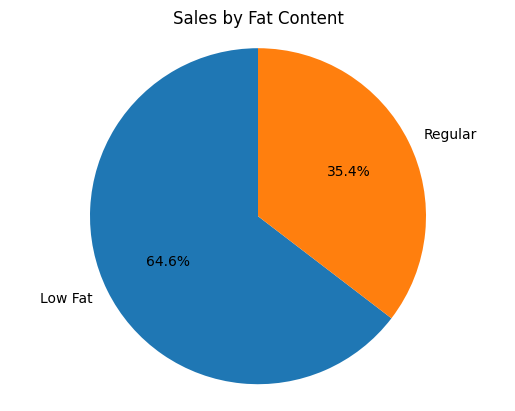

In [14]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat, labels = sales_by_fat.index,
                        autopct='%.1f%%', 
                        startangle= 90)
plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

Total Sales by Item Type

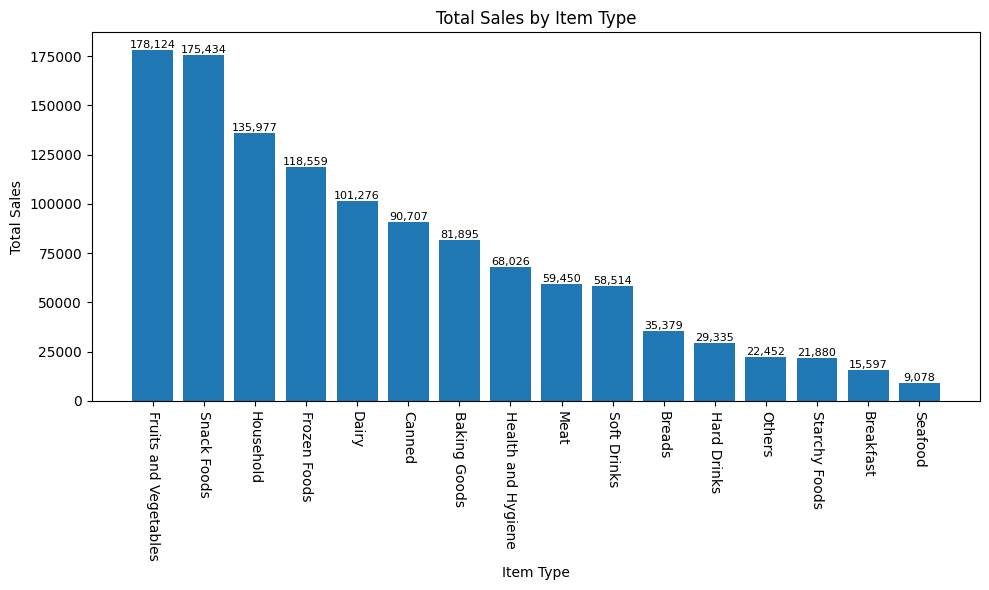

In [15]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)
plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{bar.get_height():,.0f}', ha='center', va= 'bottom', fontsize=8)

plt.tight_layout()
plt.show()

Fat Content by Outlet for Total Sales

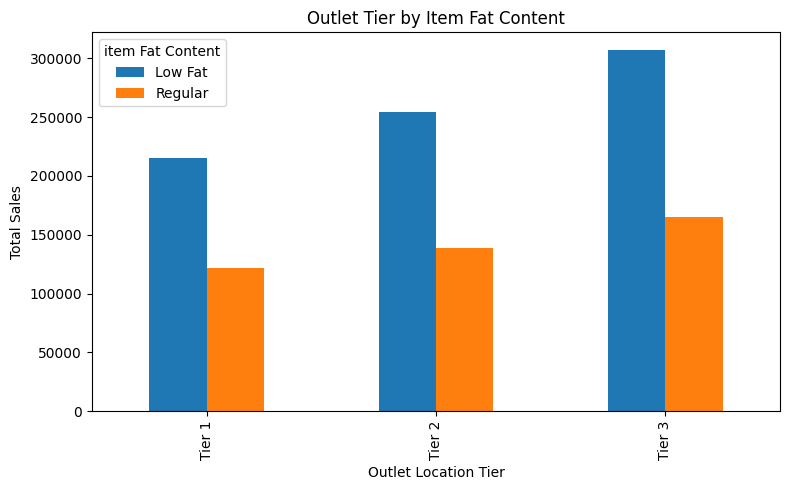

In [16]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
gropued = grouped[['Regular', 'Low Fat']]

ax = grouped.plot(kind='bar', figsize=(8, 5), title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='item Fat Content')
plt.tight_layout()
plt.show()

Total Sales by Outlet Establishment

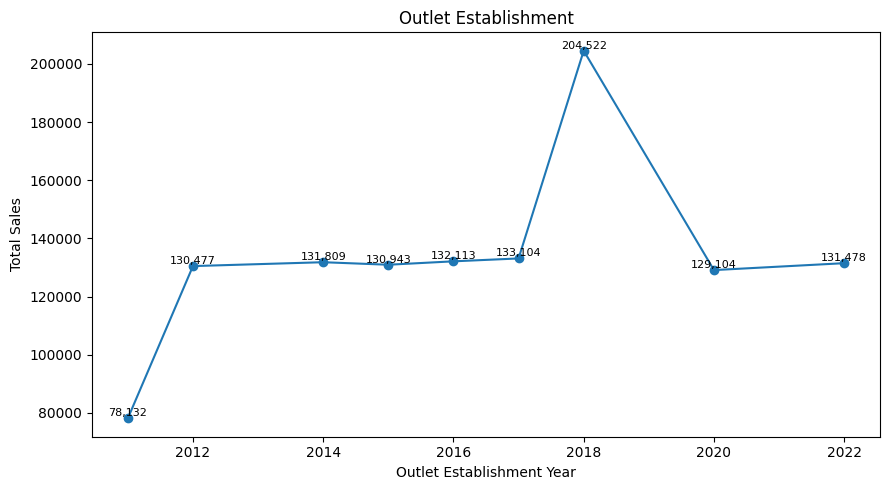

In [19]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x, y in zip(sales_by_year.index, sales_by_year.values):
        plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()